# Overview of sentiments

Summary statistics regarding the distribution of sentiments.

In [2]:
import pandas
import pandas as pd
import re
from IPython.core.debugger import set_trace
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook



In [1]:
df_sub = pandas.read_csv('enron_links_with_sentiment.csv')
df_comp = pandas.read_csv('enron_links_with_sentiment_complete.csv')
#df_roles = pandas.read_csv('../data/enron_links_with_seqntiment_roles.csv')

NameError: name 'pandas' is not defined

In [4]:
df_comp

,Unnamed: 0,Unnamed: 0.1,messageid,body,sentiment
0,0,0,1,"System Notification: At 0115 PST, WACM termina...",-0.329800
1,1,1,2,Internal path flows are now below limits. BEE...,-0.465566
2,2,2,3,Path 15 S-N flows are near the limit. BEEP ha...,-0.357167
3,3,3,4,"Market Message: At 2141 PST, WACM requested co...",0.157909
4,4,4,5,"Beginning HE20, the 10 minute and expost prici...",-0.268763
5,5,5,6,Starting HE19 the ISO is posting incorrect 10 ...,-0.385466
6,6,6,7,To Market Participants and Scheduling Coordina...,-0.099021
7,7,7,8,The price is still 91.87. Keoni Almeida Calif...,-0.213896
8,8,8,9,So . . . you were looking for a one night st...,0.187183
9,9,9,10,Hey there Bill! I thought I'd drop a quick l...,0.333776


In [5]:
df_comp.shape

(255636, 5)

In [9]:
# df_roles does not contain community information.
df_sub

,Unnamed: 0,Unnamed: 0.1,messageid,from,to,date,from_title,from_note,to_title,to_note,sentiment,source_group,target_group
0,0,77,185,amy.fitzpatrick@enron.com,ryan.slinger@enron.com,"Mon, 9 Apr 2001 20:07:00 -0700 (PDT)",NaN,NaN,Trader,NaN,-0.071852,0,0
1,1,88,219,amy.fitzpatrick@enron.com,geir.solberg@enron.com,"Tue, 5 Feb 2002 19:14:48 -0800 (PST)",NaN,NaN,Employee,Analyst,0.267166,0,0
2,2,89,220,amy.fitzpatrick@enron.com,craig.dean@enron.com,"Tue, 5 Feb 2002 19:13:50 -0800 (PST)",NaN,NaN,Trader,NaN,0.238367,0,0
3,3,117,312,albert.meyers@enron.com,craig.dean@enron.com,"Tue, 1 Jan 2002 20:57:55 -0800 (PST)",NaN,NaN,Trader,NaN,0.016393,0,0
4,4,123,322,susan.amador@enron.com,kate.symes@enron.com,"Fri, 7 Dec 2001 13:37:47 -0800 (PST)",NaN,NaN,Employee,NaN,0.183688,0,0
5,5,183,1811,bill.williams@enron.com,geir.solberg@enron.com,"Thu, 24 Jan 2002 14:57:26 -0800 (PST)",NaN,NaN,Employee,Analyst,-0.041946,0,0
6,6,188,1819,bill.williams@enron.com,craig.dean@enron.com,"Mon, 14 Jan 2002 15:20:38 -0800 (PST)",NaN,NaN,Trader,NaN,0.067248,0,0
7,7,189,1820,bill.williams@enron.com,ryan.slinger@enron.com,"Fri, 11 Jan 2002 13:18:15 -0800 (PST)",NaN,NaN,Trader,NaN,-0.194163,0,0
8,8,190,1821,bill.williams@enron.com,craig.dean@enron.com,"Thu, 10 Jan 2002 19:36:02 -0800 (PST)",NaN,NaN,Trader,NaN,0.181946,0,0
9,9,194,1835,bill.williams@enron.com,ryan.slinger@enron.com,"Thu, 27 Dec 2001 12:53:26 -0800 (PST)",NaN,NaN,Trader,NaN,0.030324,0,0


In [10]:
binwidth = 0.1

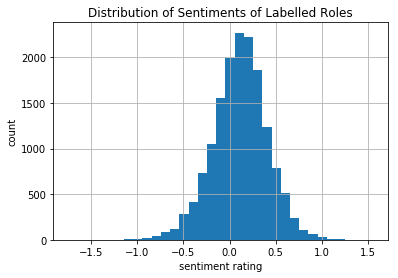

In [11]:
ax = df_sub.sentiment.hist(bins=np.arange(min(df_sub.sentiment), max(df_sub.sentiment) + binwidth, binwidth))
plt.title("Distribution of Sentiments of Labelled Roles") # is this the right thing?
ax.set_xlabel('sentiment rating')
ax.set_ylabel('count')
plt.savefig('sentiment_distribution_sub.png')

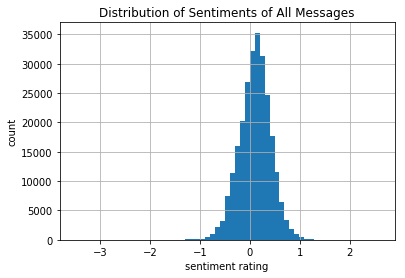

In [12]:
ax = df_comp.sentiment.hist(bins=np.arange(min(df_comp.sentiment), max(df_comp.sentiment) + binwidth, binwidth))
plt.title("Distribution of Sentiments of All Messages") # is this the right thing?
ax.set_xlabel('sentiment rating')
ax.set_ylabel('count')
plt.savefig('sentiment_distribution_all.png')

In [13]:
# most positive sentiments
df_sub.sort_values(['sentiment'], ascending=False)

,Unnamed: 0,Unnamed: 0.1,messageid,from,to,date,from_title,from_note,to_title,to_note,sentiment,source_group,target_group
14676,14680,100842,240289,steven.harris@enron.com,tracy.geaccone@enron.com,"Tue, 23 Oct 2001 11:49:44 -0700 (PDT)",NaN,NaN,Employee,NaN,1.554689,5,5
15296,15300,106387,252300,steven.harris@enron.com,tracy.geaccone@enron.com,"Tue, 30 Oct 2001 07:42:02 -0800 (PST)",NaN,NaN,Employee,NaN,1.407264,5,5
6504,6506,36122,90202,caroline.emmert@enron.com,kate.symes@enron.com,"Wed, 21 Feb 2001 06:02:00 -0800 (PST)",NaN,NaN,Employee,NaN,1.341308,0,0
9617,9619,54928,136609,sue.nord@enron.com,richard.shapiro@enron.com,"Wed, 7 Nov 2001 05:20:19 -0800 (PST)",NaN,NaN,Vice President,Regulatory Affairs,1.240323,4,4
1838,1838,8806,25918,sally.beck@enron.com,louise.kitchen@enron.com,"Wed, 18 Apr 2001 09:12:00 -0700 (PDT)",Employee,Chief Operating Officer,President,Enron Online,1.232833,13,6
849,849,6464,21714,hector.mcloughlin@enron.com,sally.beck@enron.com,"Tue, 24 Apr 2001 13:34:22 -0700 (PDT)",NaN,NaN,Employee,Chief Operating Officer,1.223802,13,13
9620,9622,54931,136614,lisa.yoho@enron.com,richard.shapiro@enron.com,"Wed, 7 Nov 2001 13:10:15 -0800 (PST)",NaN,NaN,Vice President,Regulatory Affairs,1.221210,6,4
9096,9098,52081,129175,laurie.malone@enron.com,jeff.dasovich@enron.com,"Mon, 29 Oct 2001 08:29:50 -0800 (PST)",NaN,NaN,Employee,Government Relation Executive,1.205056,4,4
4523,4525,23698,62503,f..calger@enron.com,louise.kitchen@enron.com,"Fri, 19 Oct 2001 08:03:36 -0700 (PDT)",NaN,NaN,President,Enron Online,1.183535,10,6
10150,10152,62068,150370,stanley.horton@enron.com,shelley.corman@enron.com,"Wed, 13 Dec 2000 04:34:00 -0800 (PST)",NaN,NaN,Vice President,Regulatory Affairs,1.145540,5,5


In [27]:
df_sub.iloc[14676]

Unnamed: 0                                      14680
Unnamed: 0.1                                   100842
messageid                                      240289
from                          steven.harris@enron.com
to                           tracy.geaccone@enron.com
date            Tue, 23 Oct 2001 11:49:44 -0700 (PDT)
from_title                                        NaN
from_note                                         NaN
to_title                                     Employee
to_note                                           NaN
sentiment                                     1.55469
source_group                                        5
target_group                                        5
Name: 14676, dtype: object

In [14]:
# most positive sentiments
df_comp.sort_values(['sentiment'], ascending=False)

,Unnamed: 0,Unnamed: 0.1,messageid,body,sentiment
71623,71623,71623,71624,...,2.557465
79774,79774,79774,79775,"Due to the holiday, on Friday, December 21 tr...",2.500323
131888,131888,131888,131889,"Becky, I recently requested historical flow...",2.396869
254624,254624,254624,254625,...,2.328327
70443,70443,70443,70444,...,2.239389
71642,71642,71642,71643,...,2.220763
133939,133939,133939,133940,REMINDER TO ALL NORTH AMERICAN NATURAL GAS T...,2.174816
133940,133940,133940,133941,Several of our customers are experiencing pr...,2.164443
254480,254480,254480,254481,ATTENTION NATURAL GAS INDEX RECIPIENT: ...,2.164377
87726,87726,87726,87727,"At 12:30 EST, ICE will be packaging the Next...",2.141419


In [32]:
df_comp.iloc[183926].body

'Tana -- Please call me about this. This sub-contractor of DMB&B (our ad  agency) is doing some work for us through DMB&B.  I had sent them the  confidentiality agreement that you had helped me create.  They have made some  changes that need to be reviewed by our attorney.  Thanks  Kal Shah x 39354  ---------------------- Forwarded by Kal Shah/HOU/ECT on 07/05/2000 11:07 AM  ---------------------------   "Monica Zalta"  on 06/30/2000 01:54:34 PM To:  cc:   Subject: Fwd: Enron   IMP legal would like to make the following changes to the confidentially  agreement.  I really don\'t couldn\'t figure out what the issues were, but take a look.  Thanks.  Monica    monica zalta 212.468.3579 (p) 212.468.3070 (f) mzalta@darcyww.com  Date: Fri, 30 Jun 2000 05:30:10 -0400 From: "Philip Cornell"  To:  Cc:  Subject:  Enron Mime-Version: 1.0 Content-Type: multipart/mixed; boundary="=_154D7DF3.E687C793"   Monica,  Further to our conversation yesterday, please find attached my suggested  changes for the

In [18]:
## find all bodies with '-' in them and find average

In [16]:

df_dash = []
for i in range(len(df_comp)):
    # if body containts a '-'
    try:
        if not df_comp.iloc[i].body.find('=')  == -1:
            df_dash.append(i) 
    except:
        pass
        

In [38]:
df_comp.iloc[df_dash].sentiment.mean()


-0.065207826695557927

In [ ]:
df_dash_count = []
df_dash_index = []
for i in range(len(df_comp)):
    # if body containts a '-'
    try:
        if df_comp.iloc[i].body.count('-')  > 0:
            df_dash_count.append(df_comp.iloc[i].body.count('-'))
            df_dash_index.append(i)
    except:
        pass

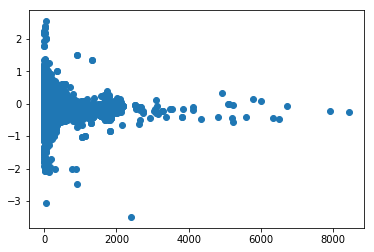

In [53]:
plt.scatter(df_dash_count,df_comp.iloc[df_dash_index].sentiment)

In [25]:
# this is without taking of the error messages
mean = df_sub[df_sub.sentiment != 0.000000].sentiment.mean()
median = df_sub[df_sub.sentiment != 0.000000].sentiment.median()
var = df_sub[df_sub.sentiment != 0.000000].sentiment.var()
print("mean senitment: {}".format(mean))
print("median sentiment: {}".format(median))
print("variance of sentiment: {}".format(var))

mean senitment: 0.11377500139058043
median sentiment: 0.1216556467115879
variance of sentiment: 0.08728732879084306


In [27]:
mean = df_comp[df_comp.sentiment != 0.000000].sentiment.mean()
median = df_comp[df_comp.sentiment != 0.000000].sentiment.median()
var = df_comp[df_comp.sentiment != 0.000000].sentiment.var()
print("mean senitment: {}".format(mean))
print("median sentiment: {}".format(median))
print("variance of sentiment: {}".format(var))


mean senitment: 0.09914189553556556
median sentiment: 0.1124805323779583
variance of sentiment: 0.10206221495472177


## Is the difference between the two means significant?

In [106]:
df

,Unnamed: 0,Unnamed: 0.1,messageid,body,sentiment
0,0,0,1,"System Notification: At 0115 PST, WACM termina...",-0.329800
1,1,1,2,Internal path flows are now below limits. BEE...,-0.465566
2,2,2,3,Path 15 S-N flows are near the limit. BEEP ha...,-0.357167
3,3,3,4,"Market Message: At 2141 PST, WACM requested co...",0.157909
4,4,4,5,"Beginning HE20, the 10 minute and expost prici...",-0.268763
5,5,5,6,Starting HE19 the ISO is posting incorrect 10 ...,-0.385466
6,6,6,7,To Market Participants and Scheduling Coordina...,-0.099021
7,7,7,8,The price is still 91.87. Keoni Almeida Calif...,-0.213896
8,8,8,9,So . . . you were looking for a one night st...,0.187183
9,9,9,10,Hey there Bill! I thought I'd drop a quick l...,0.333776


In [187]:
# fill the rest of the df with values drawn from here.
for i in df[df.sentiment == 0.000000].index:
    df.iloc[i,4] = np.random.normal(mean, pow(var, 0.5))

In [183]:
df.to_csv('../data/complete_sim_sent.csv')

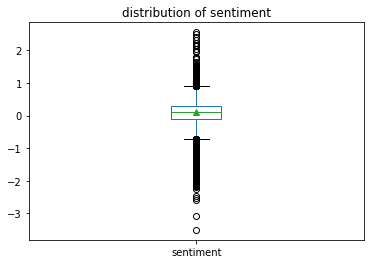

In [184]:
df[df.sentiment != 0.000000].sort_values(['messageid'], ascending=False).sentiment.plot.box(title='distribution of sentiment', showmeans=True)

In [185]:
num_rows = df.shape[0]
df.body = df.body.fillna("")

In [186]:
# remove all the error messages.
# TODO find any other automatically generated responses.
# TODO confirm that outliers are just out of touch.
df_minus_error = df[~df.body.str.startswith('start date')].sort_values(['sentiment'])
num_error_messages = num_rows - df_minus_error.shape[0]

In [62]:
df.iloc[15315,3]

'    Attention Fantasy Players! Cant find that perfect gift? Let MVP.com make it easy for you! Save 10% on your next purchase when you purchase a Gift Certificate from now until 12/27/01. Click Here for Details.        Brought to you by                           You are receiving these e-reports because you have signed up for     CBS SportsLine.com Fantasy Football.  To customize, reschedule,     or turn off these reports please      click here  NFL Reports,\xa0Player Updates\xa0  if (!random) {if (parent.random) {var random = parent.random} else {var abc = Math.random() + ""; var random = abc.substring(2,abc.length);}} document.write(\'\');      Latest NFL Player NewsJerome Bettis, RB PIT - Who\'s Yo Daddy Updated 12/25/01Bettis is listed as questionable for Week 16. However, he may be able to return to the Steelers\' starting lineup. Bill Cowher said Bettis is progressing, and he will be used this week if healthy. James Stewart, RB DET - The Lie Downs Updated 12/23/01Stewart suffered

# Using simulated sentiments

In [188]:
df_sim = pandas.read_csv('../data/complete_sim_sent.csv')[['messageid', 'body', 'sentiment']]

In [189]:
# This is a query exported from mysql. This only grabs emails sent between people at enron.
df_mes = pandas.read_csv('../data/messages_with_id.csv')

In [190]:
df_mes

,messageid,from,to,date,from_title,from_note,to_title,to_note
0,12,crystal.hyde@enron.com,bill.williams@enron.com,"Thu, 3 May 2001 13:13:23 -0700 (PDT)",NaN,NaN,NaN,NaN
1,20,smith.day@enron.com,bill.iii@enron.com,"Tue, 24 Apr 2001 16:48:00 -0700 (PDT)",NaN,NaN,NaN,NaN
2,22,crystal.hyde@enron.com,bill.iii@enron.com,"Fri, 20 Apr 2001 17:21:00 -0700 (PDT)",NaN,NaN,NaN,NaN
3,24,thresa.allen@enron.com,bill.iii@enron.com,"Tue, 17 Apr 2001 19:07:00 -0700 (PDT)",NaN,NaN,NaN,NaN
4,25,stephanie.sever@enron.com,bill.iii@enron.com,"Mon, 2 Apr 2001 22:33:00 -0700 (PDT)",NaN,NaN,NaN,NaN
5,52,ena.relations@enron.com,all_ena_egm_eim@enron.com,"Sat, 21 Apr 2001 01:08:00 -0700 (PDT)",NaN,NaN,NaN,NaN
6,53,ena.relations@enron.com,all_ena_egm_eim@enron.com,"Wed, 18 Apr 2001 08:10:00 -0700 (PDT)",NaN,NaN,NaN,NaN
7,54,ebiz@enron.com,all.worldwide@enron.com,"Tue, 17 Apr 2001 09:08:00 -0700 (PDT)",NaN,NaN,NaN,NaN
8,55,enron.chairman@enron.com,ena.employees@enron.com,"Tue, 17 Apr 2001 09:05:00 -0700 (PDT)",NaN,NaN,NaN,NaN
9,56,greg.wolfe@enron.com,bill.iii@enron.com,"Tue, 1 May 2001 16:26:00 -0700 (PDT)",NaN,NaN,NaN,NaN


In [191]:
df_sim

,messageid,body,sentiment
0,1,"System Notification: At 0115 PST, WACM termina...",-0.329800
1,2,Internal path flows are now below limits. BEE...,-0.465566
2,3,Path 15 S-N flows are near the limit. BEEP ha...,-0.357167
3,4,"Market Message: At 2141 PST, WACM requested co...",0.157909
4,5,"Beginning HE20, the 10 minute and expost prici...",-0.268763
5,6,Starting HE19 the ISO is posting incorrect 10 ...,-0.385466
6,7,To Market Participants and Scheduling Coordina...,-0.099021
7,8,The price is still 91.87. Keoni Almeida Calif...,-0.213896
8,9,So . . . you were looking for a one night st...,0.187183
9,10,Hey there Bill! I thought I'd drop a quick l...,0.333776


In [192]:
# df_people_with_roles = pd.merge(left=df,right=df_roles, how='left', left_on='name', right_on='Full Name')
df_links_with_sent = pd.merge(left=df_mes, right=df_sim, how='left', left_on='messageid', right_on='messageid')

In [193]:
df_links_with_sent.sort_values('sentiment', ascending=False)

,messageid,from,to,date,from_title,from_note,to_title,to_note,body,sentiment
53274,131889,matt.smith@enron.com,rebecca.cantrell@enron.com,"Thu, 17 May 2001 08:07:52 -0700 (PDT)",NaN,NaN,NaN,NaN,"Becky, I recently requested historical flow...",2.396869
7717,24154,bob.shults@enron.com,eol.center@enron.com,"Tue, 29 Feb 2000 23:29:00 -0800 (PST)",NaN,NaN,NaN,NaN,Great job in a very short time scale. I secon...,1.567328
100842,240289,steven.harris@enron.com,tracy.geaccone@enron.com,"Tue, 23 Oct 2001 11:49:44 -0700 (PDT)",NaN,NaN,Employee,NaN,Wow!!!! I am so in love with you. I want to do...,1.554689
76198,183934,tana.jones@enron.com,scott.cleverly@enron.com,"Wed, 5 Jul 2000 08:57:00 -0700 (PDT)",NaN,NaN,NaN,NaN,I am a Senior Legal Specialist in the ENA Lega...,1.485927
51966,128652,jeff.dasovich@enron.com,janelle.scheuer@enron.com,"Tue, 27 Nov 2001 10:18:05 -0800 (PST)",Employee,Government Relation Executive,NaN,NaN,Janelle: Here's an email and slightly modified...,1.470023
38,94,grace.rodriguez@enron.com,center.dl-portland@enron.com,"Wed, 1 Aug 2001 20:32:21 -0700 (PDT)",NaN,NaN,NaN,NaN,We are happy to announce the arrival of sever...,1.443906
33707,85633,grace.rodriguez@enron.com,center.dl-portland@enron.com,"Wed, 1 Aug 2001 17:32:21 -0700 (PDT)",NaN,NaN,NaN,NaN,We are happy to announce the arrival of sever...,1.443906
1201,4433,amy.fitzpatrick@enron.com,center.dl-portland@enron.com,"Wed, 26 Sep 2001 10:55:42 -0700 (PDT)",NaN,NaN,NaN,NaN,"Before I leave today, I just wanted to say wha...",1.409887
106387,252300,steven.harris@enron.com,tracy.geaccone@enron.com,"Tue, 30 Oct 2001 07:42:02 -0800 (PST)",NaN,NaN,Employee,NaN,Hi. You are so wonderful. Can it get any bette...,1.407264
51023,125053,jeff.dasovich@enron.com,joseph.alamo@enron.com,"Thu, 12 Jul 2001 12:19:00 -0700 (PDT)",Employee,Government Relation Executive,NaN,NaN,Thank you SO much. This is it. Really apprec...,1.394652


In [194]:
df_links_with_sent = df_links_with_sent.drop(['body'], axis=1)

In [195]:
df_links_with_sent

,messageid,from,to,date,from_title,from_note,to_title,to_note,sentiment
0,12,crystal.hyde@enron.com,bill.williams@enron.com,"Thu, 3 May 2001 13:13:23 -0700 (PDT)",NaN,NaN,NaN,NaN,0.348099
1,20,smith.day@enron.com,bill.iii@enron.com,"Tue, 24 Apr 2001 16:48:00 -0700 (PDT)",NaN,NaN,NaN,NaN,0.036850
2,22,crystal.hyde@enron.com,bill.iii@enron.com,"Fri, 20 Apr 2001 17:21:00 -0700 (PDT)",NaN,NaN,NaN,NaN,0.182744
3,24,thresa.allen@enron.com,bill.iii@enron.com,"Tue, 17 Apr 2001 19:07:00 -0700 (PDT)",NaN,NaN,NaN,NaN,0.210597
4,25,stephanie.sever@enron.com,bill.iii@enron.com,"Mon, 2 Apr 2001 22:33:00 -0700 (PDT)",NaN,NaN,NaN,NaN,0.588286
5,52,ena.relations@enron.com,all_ena_egm_eim@enron.com,"Sat, 21 Apr 2001 01:08:00 -0700 (PDT)",NaN,NaN,NaN,NaN,0.131623
6,53,ena.relations@enron.com,all_ena_egm_eim@enron.com,"Wed, 18 Apr 2001 08:10:00 -0700 (PDT)",NaN,NaN,NaN,NaN,-0.081530
7,54,ebiz@enron.com,all.worldwide@enron.com,"Tue, 17 Apr 2001 09:08:00 -0700 (PDT)",NaN,NaN,NaN,NaN,0.159098
8,55,enron.chairman@enron.com,ena.employees@enron.com,"Tue, 17 Apr 2001 09:05:00 -0700 (PDT)",NaN,NaN,NaN,NaN,-0.112491
9,56,greg.wolfe@enron.com,bill.iii@enron.com,"Tue, 1 May 2001 16:26:00 -0700 (PDT)",NaN,NaN,NaN,NaN,0.275655


In [196]:
df_links_with_sent.to_csv('../data/enron_links_with_sentiment.csv')

In [197]:
df_links_with_sent

,messageid,from,to,date,from_title,from_note,to_title,to_note,sentiment
0,12,crystal.hyde@enron.com,bill.williams@enron.com,"Thu, 3 May 2001 13:13:23 -0700 (PDT)",NaN,NaN,NaN,NaN,0.348099
1,20,smith.day@enron.com,bill.iii@enron.com,"Tue, 24 Apr 2001 16:48:00 -0700 (PDT)",NaN,NaN,NaN,NaN,0.036850
2,22,crystal.hyde@enron.com,bill.iii@enron.com,"Fri, 20 Apr 2001 17:21:00 -0700 (PDT)",NaN,NaN,NaN,NaN,0.182744
3,24,thresa.allen@enron.com,bill.iii@enron.com,"Tue, 17 Apr 2001 19:07:00 -0700 (PDT)",NaN,NaN,NaN,NaN,0.210597
4,25,stephanie.sever@enron.com,bill.iii@enron.com,"Mon, 2 Apr 2001 22:33:00 -0700 (PDT)",NaN,NaN,NaN,NaN,0.588286
5,52,ena.relations@enron.com,all_ena_egm_eim@enron.com,"Sat, 21 Apr 2001 01:08:00 -0700 (PDT)",NaN,NaN,NaN,NaN,0.131623
6,53,ena.relations@enron.com,all_ena_egm_eim@enron.com,"Wed, 18 Apr 2001 08:10:00 -0700 (PDT)",NaN,NaN,NaN,NaN,-0.081530
7,54,ebiz@enron.com,all.worldwide@enron.com,"Tue, 17 Apr 2001 09:08:00 -0700 (PDT)",NaN,NaN,NaN,NaN,0.159098
8,55,enron.chairman@enron.com,ena.employees@enron.com,"Tue, 17 Apr 2001 09:05:00 -0700 (PDT)",NaN,NaN,NaN,NaN,-0.112491
9,56,greg.wolfe@enron.com,bill.iii@enron.com,"Tue, 1 May 2001 16:26:00 -0700 (PDT)",NaN,NaN,NaN,NaN,0.275655


In [198]:
a = df_links_with_sent[pd.notnull(df_links_with_sent['to_title'])]
# a = df_links_with_sent[pd.notnull(df_links_with_sent['to_title']) & pd.notnull(df_links_with_sent['from_title'])] #1360 rows 

In [199]:
a.to_csv('../data/enron_links_with_sentiment_roles.csv')

In [150]:
print("mean: {}".format(a.sentiment.mean()))
print("median: {}".format(a.sentiment.median()))
print("variance: {}".format(a.sentiment.var()))

mean: 0.11378935285340738
median: 0.12174072861671448
variance: 0.08721617329434773


In [159]:
a = a[~a.to_title.isin(['Trader', 'Employee'])]

In [160]:
print("mean: {}".format(a.sentiment.mean()))
print("median: {}".format(a.sentiment.median()))
print("variance: {}".format(a.sentiment.var()))

mean: 0.12828791851003965
median: 0.13722972571849826
variance: 0.08373802389121505


In [168]:
a

,messageid,from,to,date,from_title,from_note,to_title,to_note,sentiment
77,185,amy.fitzpatrick@enron.com,ryan.slinger@enron.com,"Mon, 9 Apr 2001 20:07:00 -0700 (PDT)",NaN,NaN,Trader,NaN,-0.071852
88,219,amy.fitzpatrick@enron.com,geir.solberg@enron.com,"Tue, 5 Feb 2002 19:14:48 -0800 (PST)",NaN,NaN,Employee,Analyst,0.267166
89,220,amy.fitzpatrick@enron.com,craig.dean@enron.com,"Tue, 5 Feb 2002 19:13:50 -0800 (PST)",NaN,NaN,Trader,NaN,0.238367
117,312,albert.meyers@enron.com,craig.dean@enron.com,"Tue, 1 Jan 2002 20:57:55 -0800 (PST)",NaN,NaN,Trader,NaN,0.016393
123,322,susan.amador@enron.com,kate.symes@enron.com,"Fri, 7 Dec 2001 13:37:47 -0800 (PST)",NaN,NaN,Employee,NaN,0.183688
183,1811,bill.williams@enron.com,geir.solberg@enron.com,"Thu, 24 Jan 2002 14:57:26 -0800 (PST)",NaN,NaN,Employee,Analyst,-0.041946
188,1819,bill.williams@enron.com,craig.dean@enron.com,"Mon, 14 Jan 2002 15:20:38 -0800 (PST)",NaN,NaN,Trader,NaN,0.067248
189,1820,bill.williams@enron.com,ryan.slinger@enron.com,"Fri, 11 Jan 2002 13:18:15 -0800 (PST)",NaN,NaN,Trader,NaN,-0.194163
190,1821,bill.williams@enron.com,craig.dean@enron.com,"Thu, 10 Jan 2002 19:36:02 -0800 (PST)",NaN,NaN,Trader,NaN,0.181946
194,1835,bill.williams@enron.com,ryan.slinger@enron.com,"Thu, 27 Dec 2001 12:53:26 -0800 (PST)",NaN,NaN,Trader,NaN,0.030324


In [173]:
positive_graph = a[a.sentiment > 0]
negative_graph = a[a.sentiment < 0]

In [175]:
positive_graph.shape

(10478, 9)

In [177]:
negative_graph.shape

(5181, 9)